In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset_cuaca_perjam-prophet.csv")

In [3]:
df

,date,year,month,day,hour,t2m,rh2m,ps,ws10m
0,11/30/2013,2013.0,11.0,30.0,7:00:00,27.36,78.94,100.80,3.17
1,11/30/2013,2013.0,11.0,30.0,8:00:00,28.47,73.19,100.85,2.65
2,11/30/2013,2013.0,11.0,30.0,9:00:00,29.44,69.56,100.83,2.04
3,11/30/2013,2013.0,11.0,30.0,10:00:00,30.12,67.38,100.77,1.73
4,11/30/2013,2013.0,11.0,30.0,11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...,...,...,...,...,...
1048570,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PREPROCESSING

In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop(columns=['year', 'month', 'day'], axis=1)

In [6]:
df.isnull().sum()

date     0
hour     0
t2m      0
rh2m     0
ps       0
ws10m    0
dtype: int64

In [7]:
df.dtypes

date      object
hour      object
t2m      float64
rh2m     float64
ps       float64
ws10m    float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_timedelta(df['hour'])
df['time'] = df['date'] + df['hour']

In [9]:
del df['date']
del df['hour']

In [10]:
df.rename(
    columns={"time": "ds", "t2m": "y"},
    inplace=True,
)

In [11]:
df.dtypes

y               float64
rh2m            float64
ps              float64
ws10m           float64
ds       datetime64[ns]
dtype: object

In [12]:
df.set_index(df['ds'], inplace = True)

In [13]:
# df['T_target'] = df.shift(-1)['T2M']
# df['RH_target'] = df.shift(-1)['RH2M']
# df['PS_target'] = df.shift(-1)['PS']
# df['WS_target'] = df.shift(-1)['WS10M']

In [14]:
df.dropna(inplace=True)

In [15]:
# # df.sort_index(inplace=True)

# # start_date = '2021-04-01 09:00:00'
# # end_date = '2022-05-01 16:00:00'

# df = df.iloc[-100:]

In [16]:
del df['ds']
del df['rh2m']
del df['ps']
del df['ws10m']

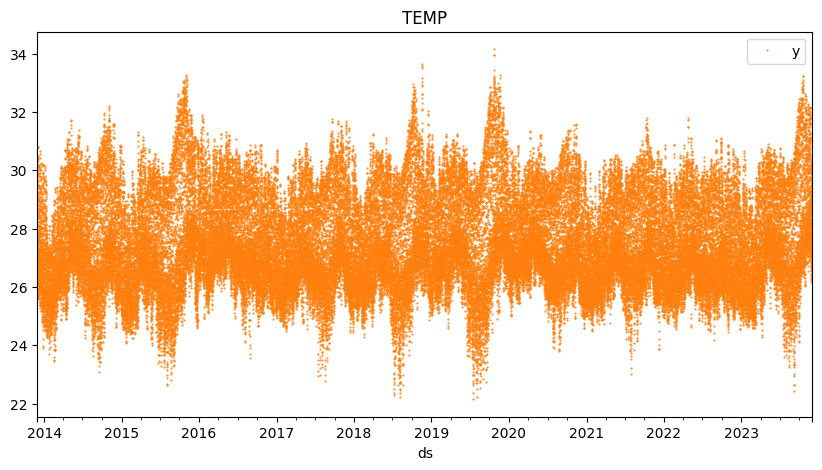

In [17]:
color_pal=sns.color_palette()
df.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[1], title = 'TEMP')
plt.show()

In [18]:
df

,y
ds,
2013-11-30 07:00:00,27.36
2013-11-30 08:00:00,28.47
2013-11-30 09:00:00,29.44
2013-11-30 10:00:00,30.12
2013-11-30 11:00:00,30.44
...,...
2023-12-01 02:00:00,27.05
2023-12-01 03:00:00,26.88
2023-12-01 04:00:00,26.82


In [19]:
# df['temperature'] = df['y'] + 3

# If you want to display the modified DataFrame
print(df)

                         y
ds                        
2013-11-30 07:00:00  27.36
2013-11-30 08:00:00  28.47
2013-11-30 09:00:00  29.44
2013-11-30 10:00:00  30.12
2013-11-30 11:00:00  30.44
...                    ...
2023-12-01 02:00:00  27.05
2023-12-01 03:00:00  26.88
2023-12-01 04:00:00  26.82
2023-12-01 05:00:00  26.73
2023-12-01 06:00:00  27.15

[87672 rows x 1 columns]


In [20]:
# df.sort_index(inplace=True)
# data_range = df.loc['2023-11-01 09:00:00':'2023-12-01 09:00:00']

In [21]:
# df['2021':'2022'].plot(subplots=True, figsize=(20,12))

In [22]:
# data_range['T2M'].plot()

## SPLITTING DATA

In [23]:
# df.reset_index(inplace=True)

In [24]:
df = df.sort_index()

train_percentage = 0.8
train_size = int(len(df) * train_percentage)

train_data = df[:train_size]
test_data = df[train_size:]

In [25]:
model = Prophet()
fit_model = model.fit(train_data.reset_index())

08:36:03 - cmdstanpy - INFO - Chain [1] start processing
08:38:15 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# # future = pd.DataFrame({'ds': train_data['ds']})
# future = model.make_future_dataframe(periods=10000, freq='h')
# forecast = model.predict(future)

In [27]:
# future = pd.DataFrame({'ds': train_data['ds']})
# future = model.make_future_dataframe(periods=10000, freq='h')
forecast = model.predict(test_data.reset_index())

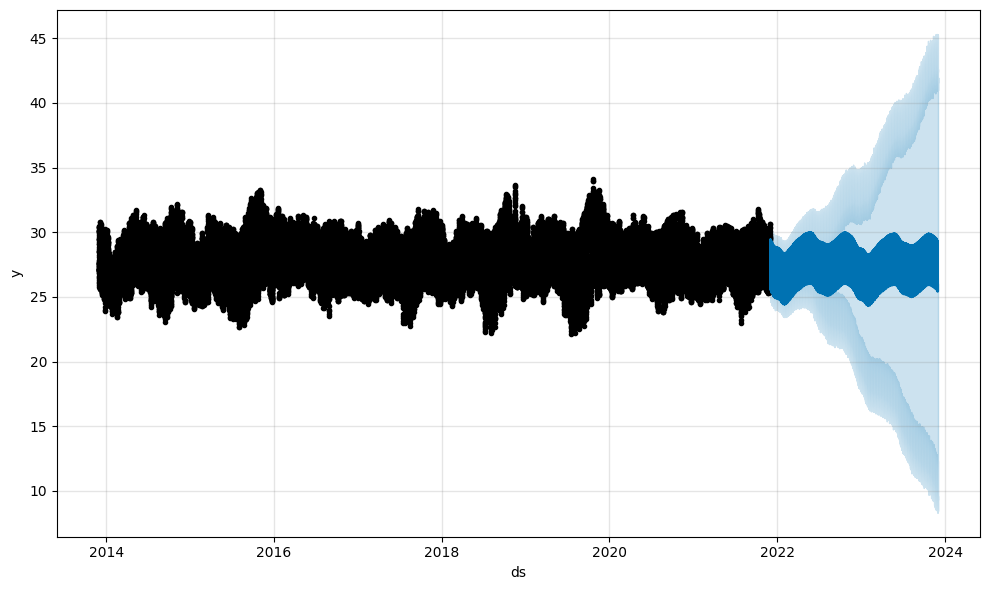

In [28]:
fig = model.plot(forecast)

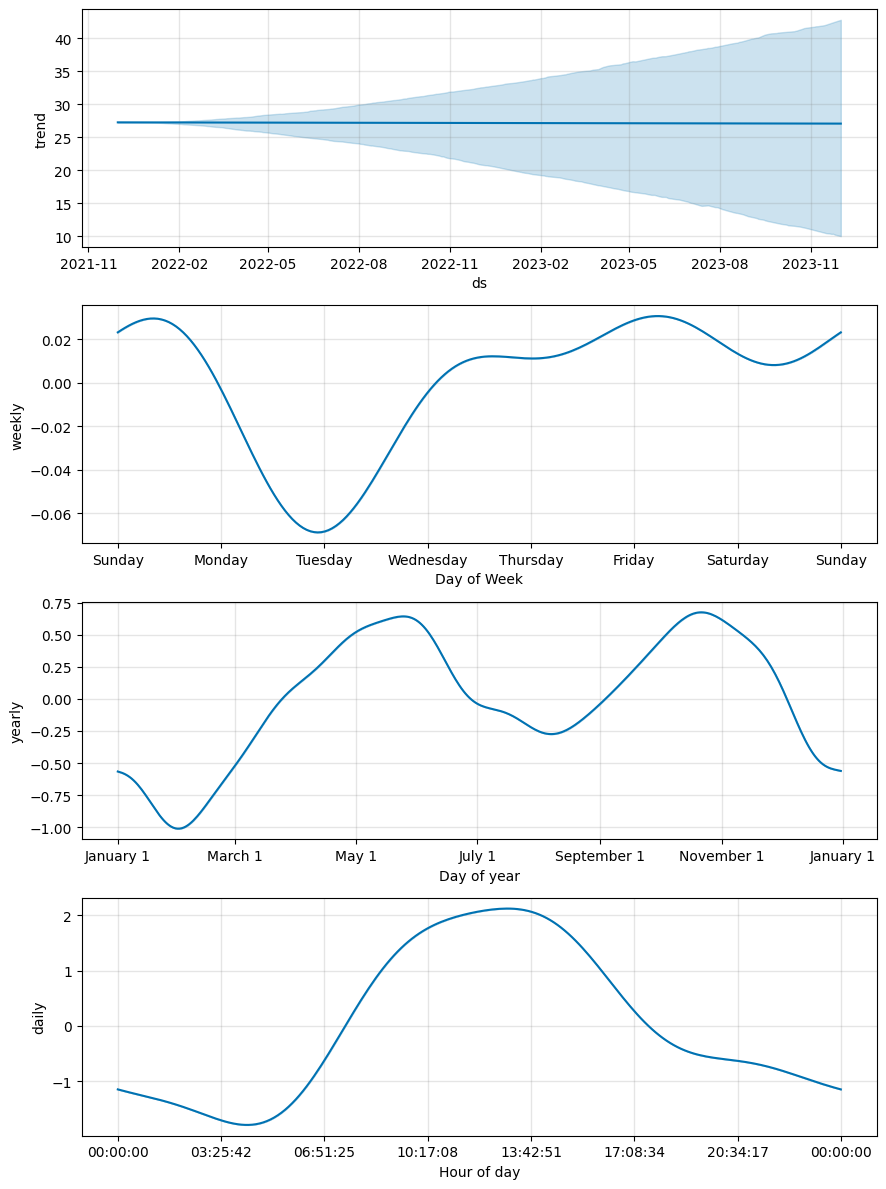

In [29]:
fig = model.plot_components(forecast)

In [30]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-30 16:00:00,27.253755,27.447204,29.218091,27.253755,27.253755,1.118430,1.118430,1.118430,1.038789,...,-0.028867,-0.028867,-0.028867,0.108508,0.108508,0.108508,0.0,0.0,0.0,28.372184
1,2021-11-30 17:00:00,27.253744,26.869373,28.564648,27.253744,27.253744,0.441625,0.441625,0.441625,0.359976,...,-0.025488,-0.025488,-0.025488,0.107138,0.107138,0.107138,0.0,0.0,0.0,27.695369
2,2021-11-30 18:00:00,27.253733,26.271936,28.078994,27.253733,27.253733,-0.096670,-0.096670,-0.096670,-0.180273,...,-0.022163,-0.022163,-0.022163,0.105766,0.105766,0.105766,0.0,0.0,0.0,27.157063
3,2021-11-30 19:00:00,27.253722,25.965519,27.760503,27.253722,27.253722,-0.391615,-0.391615,-0.391615,-0.477092,...,-0.018915,-0.018915,-0.018915,0.104392,0.104392,0.104392,0.0,0.0,0.0,26.862107
4,2021-11-30 20:00:00,27.253711,25.881806,27.623133,27.253711,27.253711,-0.503387,-0.503387,-0.503387,-0.590637,...,-0.015766,-0.015766,-0.015766,0.103016,0.103016,0.103016,0.0,0.0,0.0,26.750325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,2023-12-01 02:00:00,27.064292,8.721292,41.948691,9.987905,42.809646,-1.291015,-1.291015,-1.291015,-1.432061,...,0.029806,0.029806,0.029806,0.111241,0.111241,0.111241,0.0,0.0,0.0,25.773277
17531,2023-12-01 03:00:00,27.064281,8.505005,41.338019,9.986432,42.811626,-1.485223,-1.485223,-1.485223,-1.625301,...,0.030202,0.030202,0.030202,0.109875,0.109875,0.109875,0.0,0.0,0.0,25.579058
17532,2023-12-01 04:00:00,27.064270,8.450186,41.230416,9.984959,42.813606,-1.638017,-1.638017,-1.638017,-1.776994,...,0.030469,0.030469,0.030469,0.108508,0.108508,0.108508,0.0,0.0,0.0,25.426253
17533,2023-12-01 05:00:00,27.064259,8.554546,40.983312,9.983485,42.815586,-1.569357,-1.569357,-1.569357,-1.707096,...,0.030601,0.030601,0.030601,0.107138,0.107138,0.107138,0.0,0.0,0.0,25.494902


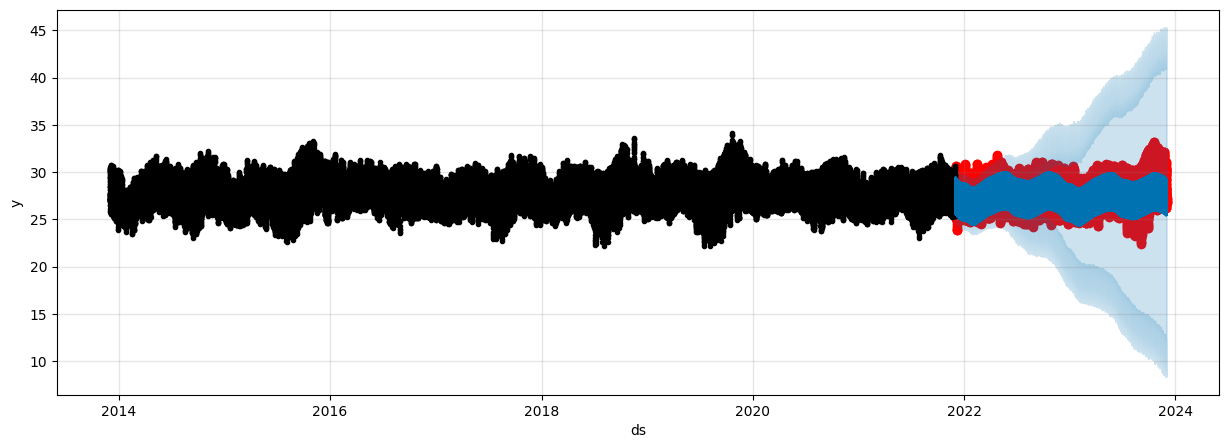

In [31]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_data.index, test_data['y'], color='r')
fig = model.plot(forecast, ax=ax)

In [32]:
test_data['y']

ds
2021-11-30 16:00:00    27.14
2021-11-30 17:00:00    26.57
2021-11-30 18:00:00    26.08
2021-11-30 19:00:00    25.92
2021-11-30 20:00:00    25.83
                       ...  
2023-12-01 02:00:00    27.05
2023-12-01 03:00:00    26.88
2023-12-01 04:00:00    26.82
2023-12-01 05:00:00    26.73
2023-12-01 06:00:00    27.15
Name: y, Length: 17535, dtype: float64

In [33]:
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(test_data['y']) - np.array(forecast['yhat'])) / np.array(test_data['y']))) * 100
r2 = r2_score(test_data['y'], forecast['yhat'])

In [34]:
print('mae :', mae)
print('mse :', mse)
print('rmse :', rmse)
print('mape :', mape)
print('r2score:', r2)

mae : 0.6206183783734661
mse : 0.6319711990496161
rmse : 0.7949661622041633
mape : 2.233860940707586
r2score: 0.73613893626548


In [35]:
import joblib

joblib.dump(fit_model, 'prophet_model_temp.pkl')

['prophet_model_temp.pkl']

In [36]:
model = joblib.load('prophet_model_temp.pkl')

In [37]:
future_dates = pd.date_range(start='2024-06-01', end='2025-10-01', freq='h')
future = pd.DataFrame(future_dates, columns=['ds'])
forecast = model.predict(future)

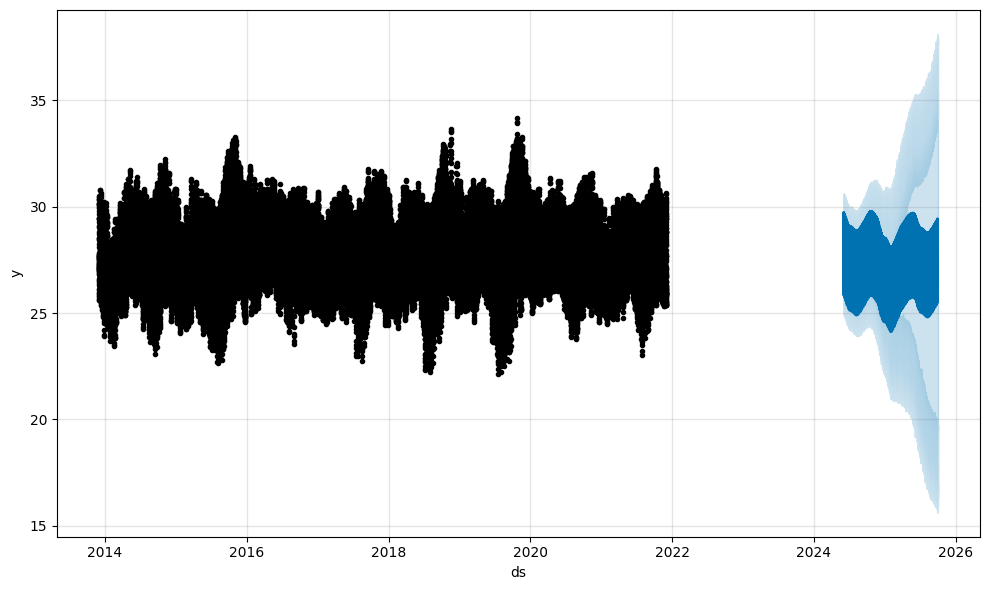

In [38]:
fig = model.plot(forecast)
plt.show()

In [62]:

# Define new data point for prediction
new_data_point = pd.DataFrame({'ds': ['2024-06-13 08:00:00'], 'y': [60]})

# Make prediction using the loaded model
forecast = model.predict(new_data_point)

# Display the prediction
print(forecast[['ds', 'yhat']])

                   ds       yhat
0 2024-06-13 08:00:00  27.761278
